In [2]:
pip install joblib

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [4]:
df = pd.read_csv('solarpowergeneration.csv')
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [7]:
df.shape

(2920, 10)

In [8]:
df.dtypes

,0
distance-to-solar-noon,float64
temperature,int64
wind-direction,int64
wind-speed,float64
sky-cover,int64
visibility,float64
humidity,int64
average-wind-speed-(period),float64
average-pressure-(period),float64
power-generated,int64


In [9]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


Veriables in Dataset


distance-to-solar-noon

temperature

wind-direction

wind-speed

sky-cover

visibility

humidity

average-wind-speed-(period)

average-pressure-(period)

power-generated


Handling missing values and filling it by the mean

In [10]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [11]:
missing_values = df['average-wind-speed-(period)'].isnull().sum()

# Count the number of zero values in the column
zero_values = (df['average-wind-speed-(period)'] == 0).sum()

print(f"Missing values: {missing_values}")
print(f"Zero values: {zero_values}")

Missing values: 1
Zero values: 375


In [12]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)


In [13]:
#replace zeros with the mean of the column
mean_value = df['average-wind-speed-(period)'].mean()
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].replace(0, mean_value)


In [14]:
missing_values = df['average-wind-speed-(period)'].isnull().sum()

# Count the number of zero values in the column
zero_values = (df['average-wind-speed-(period)'] == 0).sum()

print(f"Missing values: {missing_values}")
print(f"Zero values: {zero_values}")

Missing values: 0
Zero values: 0


In [15]:
df


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.000000,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.000000,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,10.129154,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,10.129154,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.000000,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.000000,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.000000,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.000000,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.000000,29.87,677


In [16]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                              distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.118010     0.342146   
wind-speed                                -0.145073     0.096267   
sky-cover                                 -0.015184    -0.230672   
visibility                                 0.065807     0.194110   
humidity                                   0.368964    -0.221463   
average-wind-speed-(period)               -0.191391     0.033400   
average-pressure-(period)                  0.082505    -0.435723   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.118010   -0.145073  -0.015184   
temperature                        0.342146    0.096267  -0.230672   
wind-direction     

Visualization

In [17]:
plt.figure(figsize=(20, 16))

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

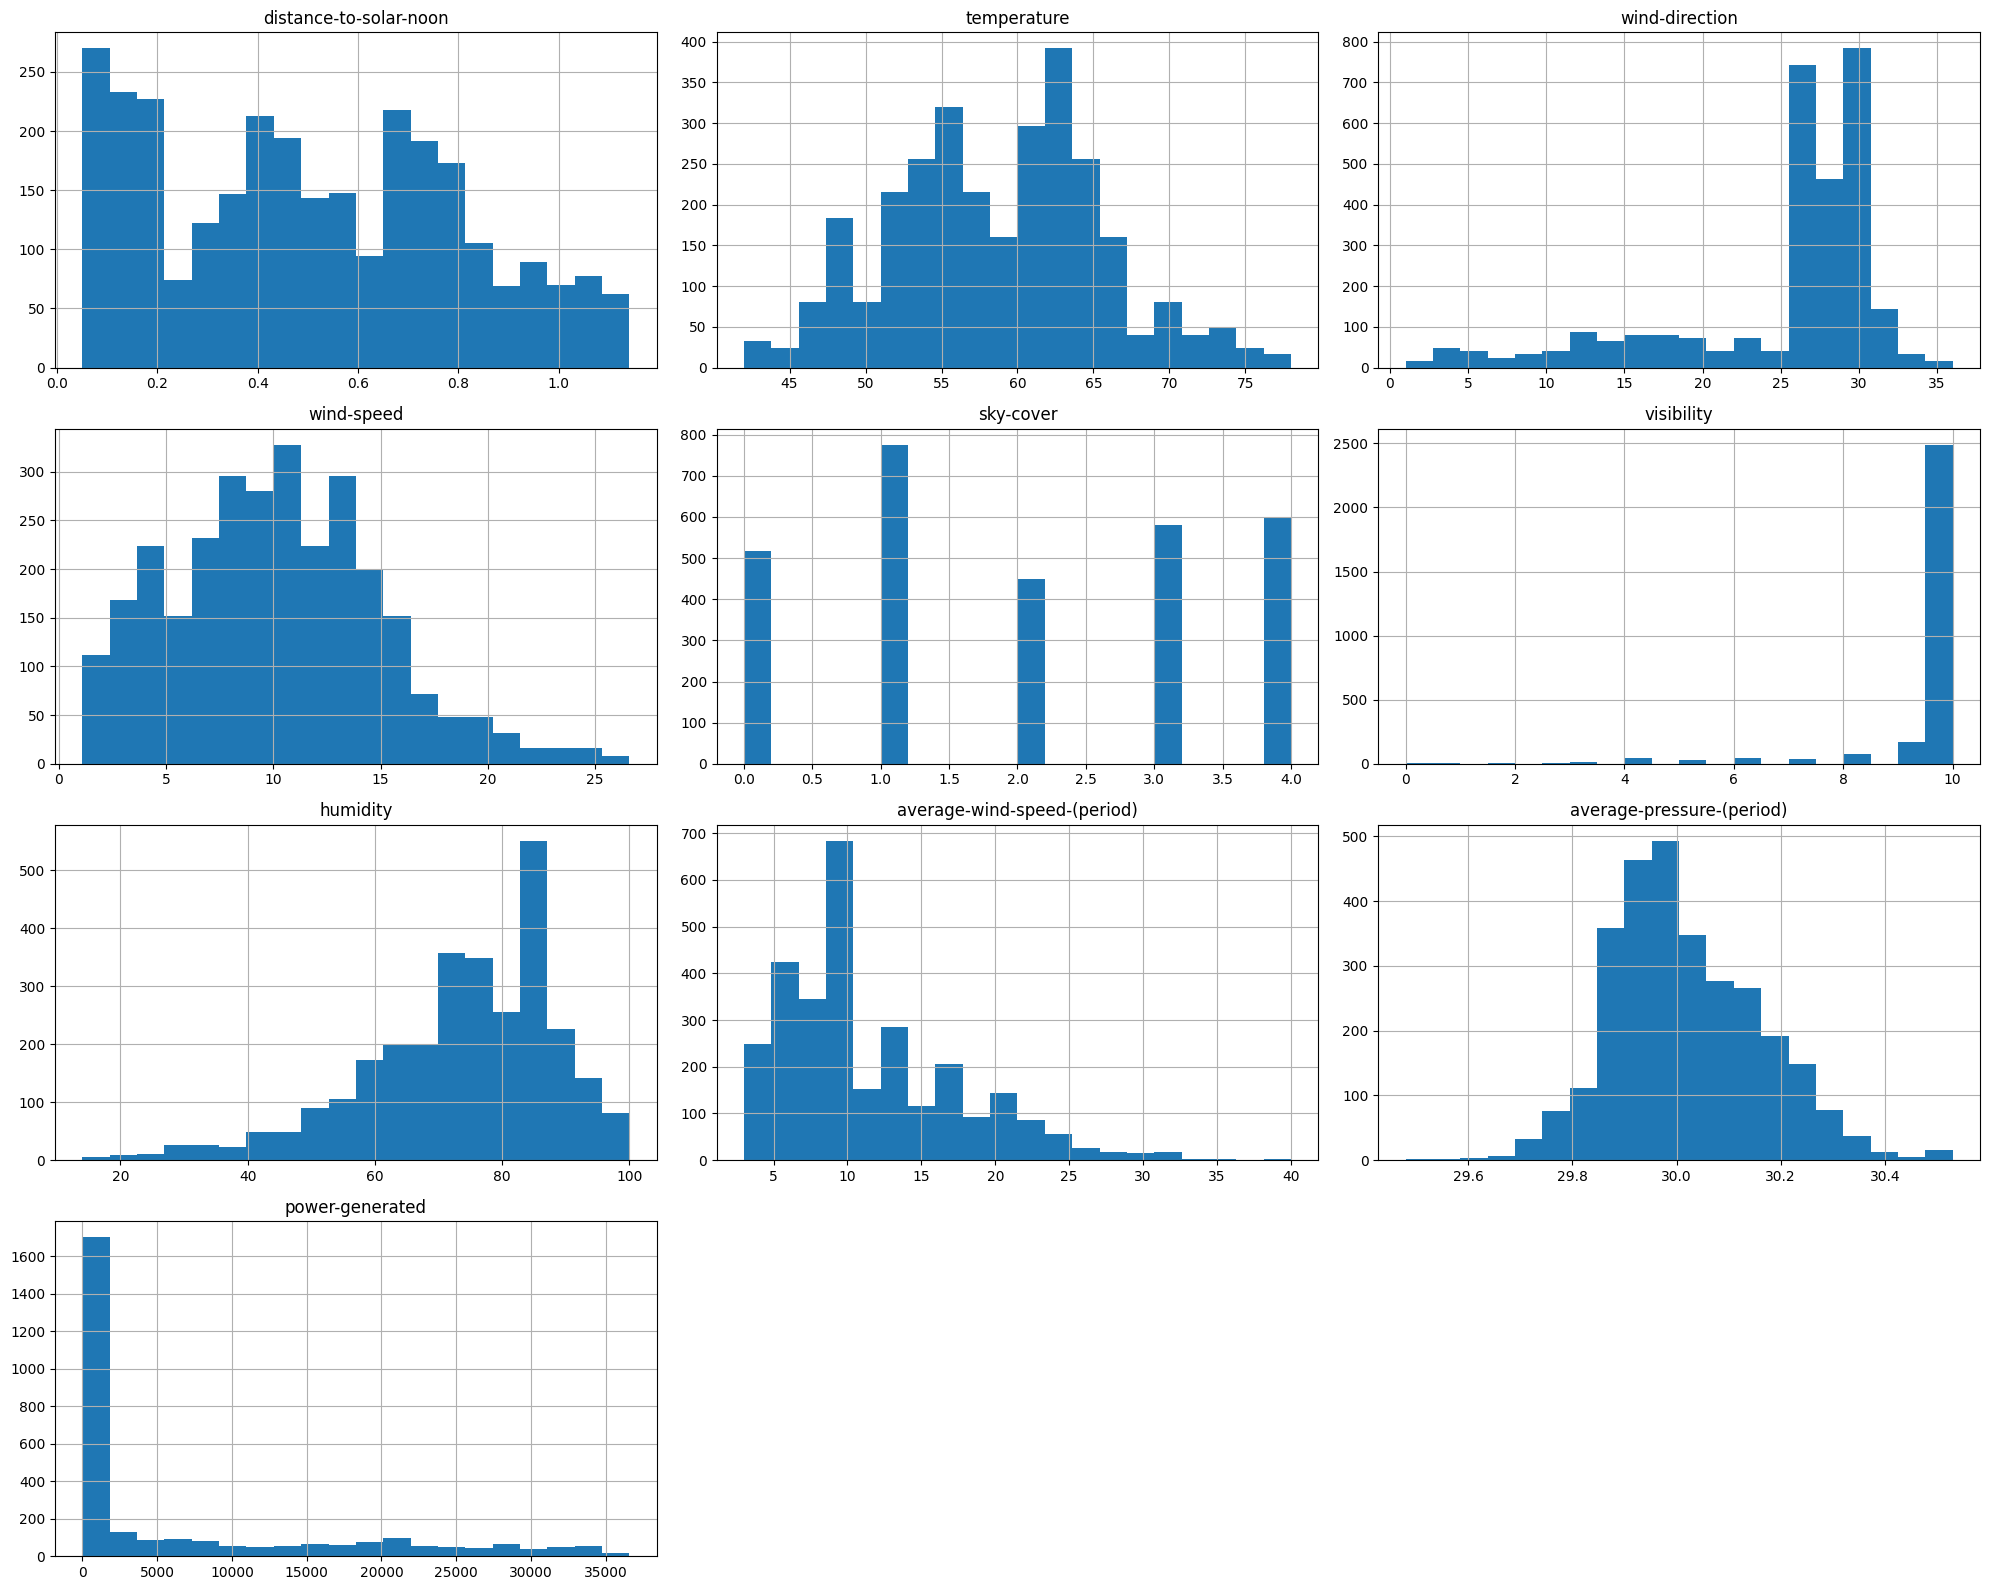

In [18]:
df.hist(bins=20, figsize=(20, 16))
plt.tight_layout()
plt.show()

Distribution of the target variable

Text(0, 0.5, 'Frequency')

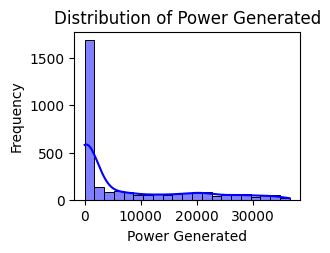

In [19]:
plt.subplot(2, 2, 1)
sns.histplot(df['power-generated'], kde=True, color='blue')
plt.title('Distribution of Power Generated')
plt.xlabel('Power Generated')
plt.ylabel('Frequency')

Calculate skewness for each numeric variable

In [20]:
skewness_values = df.skew()
print("\nSkewness of each variable:\n", skewness_values)


Skewness of each variable:
 distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.954072
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64


<ipython-input-21-29931928ef09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness_values.index, y=skewness_values.values, palette='Blues_d')


Text(0.5, 1.0, 'Skewness of Each Variable')

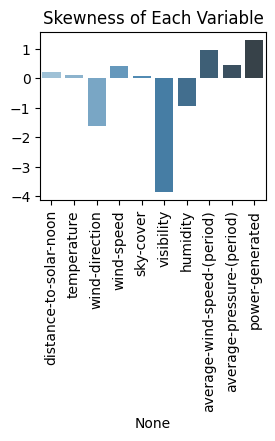

In [21]:
plt.subplot(2, 2, 1)
sns.barplot(x=skewness_values.index, y=skewness_values.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Skewness of Each Variable')

Box plots for outlier detection

Text(0.5, 1.0, 'Boxplot of Power Generated')

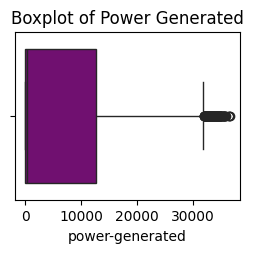

In [22]:
plt.subplot(2, 2, 1)
sns.boxplot(x=df['power-generated'], color='purple')
plt.title('Boxplot of Power Generated')

Text(0.5, 1.0, 'Boxplot of Temperature')

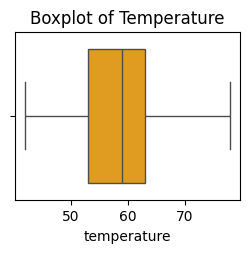

In [23]:
plt.subplot(2, 2, 1)
sns.boxplot(x=df['temperature'], color='orange')
plt.title('Boxplot of Temperature')

Calculate IQR

In [24]:
Q1 = df['power-generated'].quantile(0.25)
Q3 = df['power-generated'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['power-generated'] < lower_bound) | (df['power-generated'] > upper_bound)]['power-generated']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: -19085.25
 - Upper bound: 31808.75
 - Number of outliers: 107
 - Outliers: [31911 32890 32187 31880 32324 33387 32254 31885 32377 33390 33045 32471
 33463 34212 33706 32087 33510 33567 36580 35251 34751 32802 33175 33296
 35778 34976 34173 35553 36400 34289 34480 33944 34329 33627 34252 34324
 32864 33434 32018 34177 35282 35743 35635 34780 33746 34371 33753 34140
 33393 35474 34710 36368 33064 32263 35153 33454 32083 34592 33697 33111
 35033 33481 32483 32832 34434 34320 35405 34373 34647 34902 35486 33563
 34620 32108 33909 32729 32195 34591 33639 32608 34224 32484 34718 32812
 34957 34682 33470 34459 33306 32389 34021 34447 34325 33187 34055 33210
 31908 32295 32235 33293 32413 33053 32668 34720 32841 32513 32524]



In [25]:
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]['temperature']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: 38.0
 - Upper bound: 78.0
 - Number of outliers: 0
 - Outliers: []



In [26]:
Q1 = df['wind-speed'].quantile(0.25)
Q3 = df['wind-speed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['wind-speed'] < lower_bound) | (df['wind-speed'] > upper_bound)]['wind-speed']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: -3.1500000000000004
 - Upper bound: 22.85
 - Number of outliers: 40
 - Outliers: [25.1 25.1 25.1 25.1 25.1 25.1 25.1 25.1 26.6 26.6 26.6 26.6 26.6 26.6
 26.6 26.6 24.4 24.4 24.4 24.4 24.4 24.4 24.4 24.4 23.5 23.5 23.5 23.5
 23.5 23.5 23.5 23.5 23.3 23.3 23.3 23.3 23.3 23.3 23.3 23.3]



In [27]:
Q1 = df['sky-cover'].quantile(0.25)
Q3 = df['sky-cover'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['sky-cover'] < lower_bound) | (df['sky-cover'] > upper_bound)]['sky-cover']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: -2.0
 - Upper bound: 6.0
 - Number of outliers: 0
 - Outliers: []



In [28]:
Q1 = df['average-wind-speed-(period)'].quantile(0.25)
Q3 = df['average-wind-speed-(period)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['average-wind-speed-(period)'] < lower_bound) | (df['average-wind-speed-(period)'] > upper_bound)]['average-wind-speed-(period)']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: -5.0
 - Upper bound: 27.0
 - Number of outliers: 59
 - Outliers: [29. 29. 30. 28. 28. 33. 29. 28. 31. 28. 31. 28. 32. 38. 28. 28. 29. 31.
 28. 28. 40. 39. 32. 30. 28. 29. 31. 32. 29. 31. 28. 31. 30. 31. 31. 36.
 28. 29. 30. 28. 28. 33. 28. 32. 33. 36. 32. 30. 31. 29. 32. 31. 29. 28.
 31. 28. 28. 29. 30.]



In [29]:
Q1 = df['average-pressure-(period)'].quantile(0.25)
Q3 = df['average-pressure-(period)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['average-pressure-(period)'] < lower_bound) | (df['average-pressure-(period)'] > upper_bound)]['average-pressure-(period)']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")

 - Lower bound: 29.635000000000005
 - Upper bound: 30.394999999999996
 - Number of outliers: 31
 - Outliers: [30.4  30.4  30.42 30.43 30.47 30.53 30.49 30.47 30.5  30.52 30.5  30.49
 30.5  30.51 30.43 30.42 30.49 30.48 30.47 30.49 30.51 30.5  30.49 30.5
 30.5  29.62 29.59 29.52 29.48 29.56 29.61]



Correlation matrix heatmap


Text(0.5, 1.0, 'Correlation Matrix')

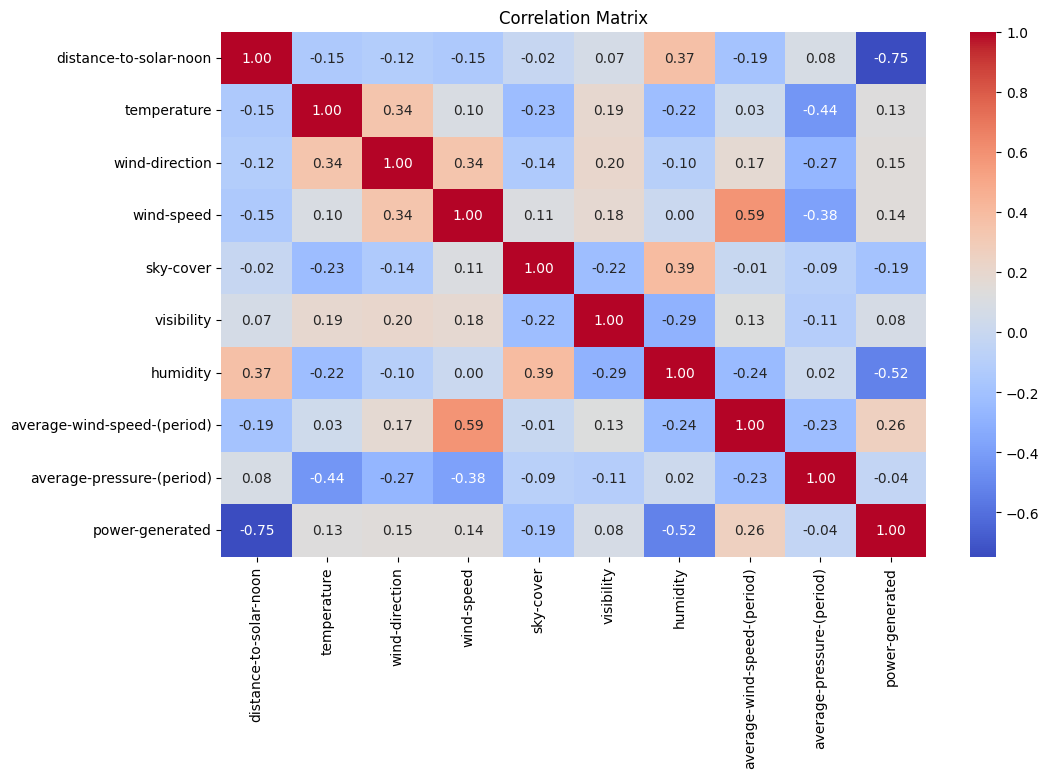

In [30]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

Scatter plots for selected variables vs. target

Text(0, 0.5, 'Power Generated')

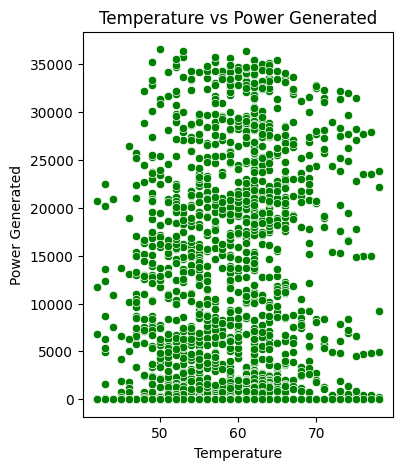

In [31]:
plt.figure(figsize=(4,5))
sns.scatterplot(x='temperature', y='power-generated', data=df, color='green')
plt.title('Temperature vs Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')

Text(0, 0.5, 'Power Generated')

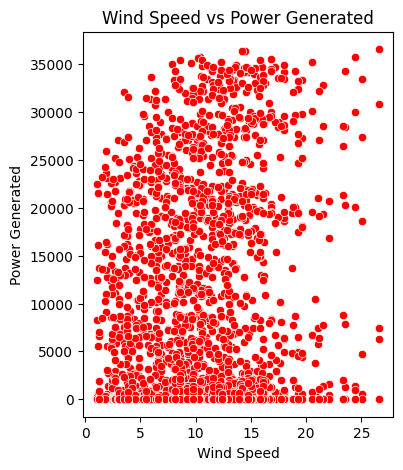

In [32]:
plt.figure(figsize=(4,5))
sns.scatterplot(x='wind-speed', y='power-generated', data=df, color='red')
plt.title('Wind Speed vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')

Pairplot for relationships between all variables

Text(0.5, 1.01, 'Pairplot of All Variables')

<Figure size 2500x1500 with 0 Axes>

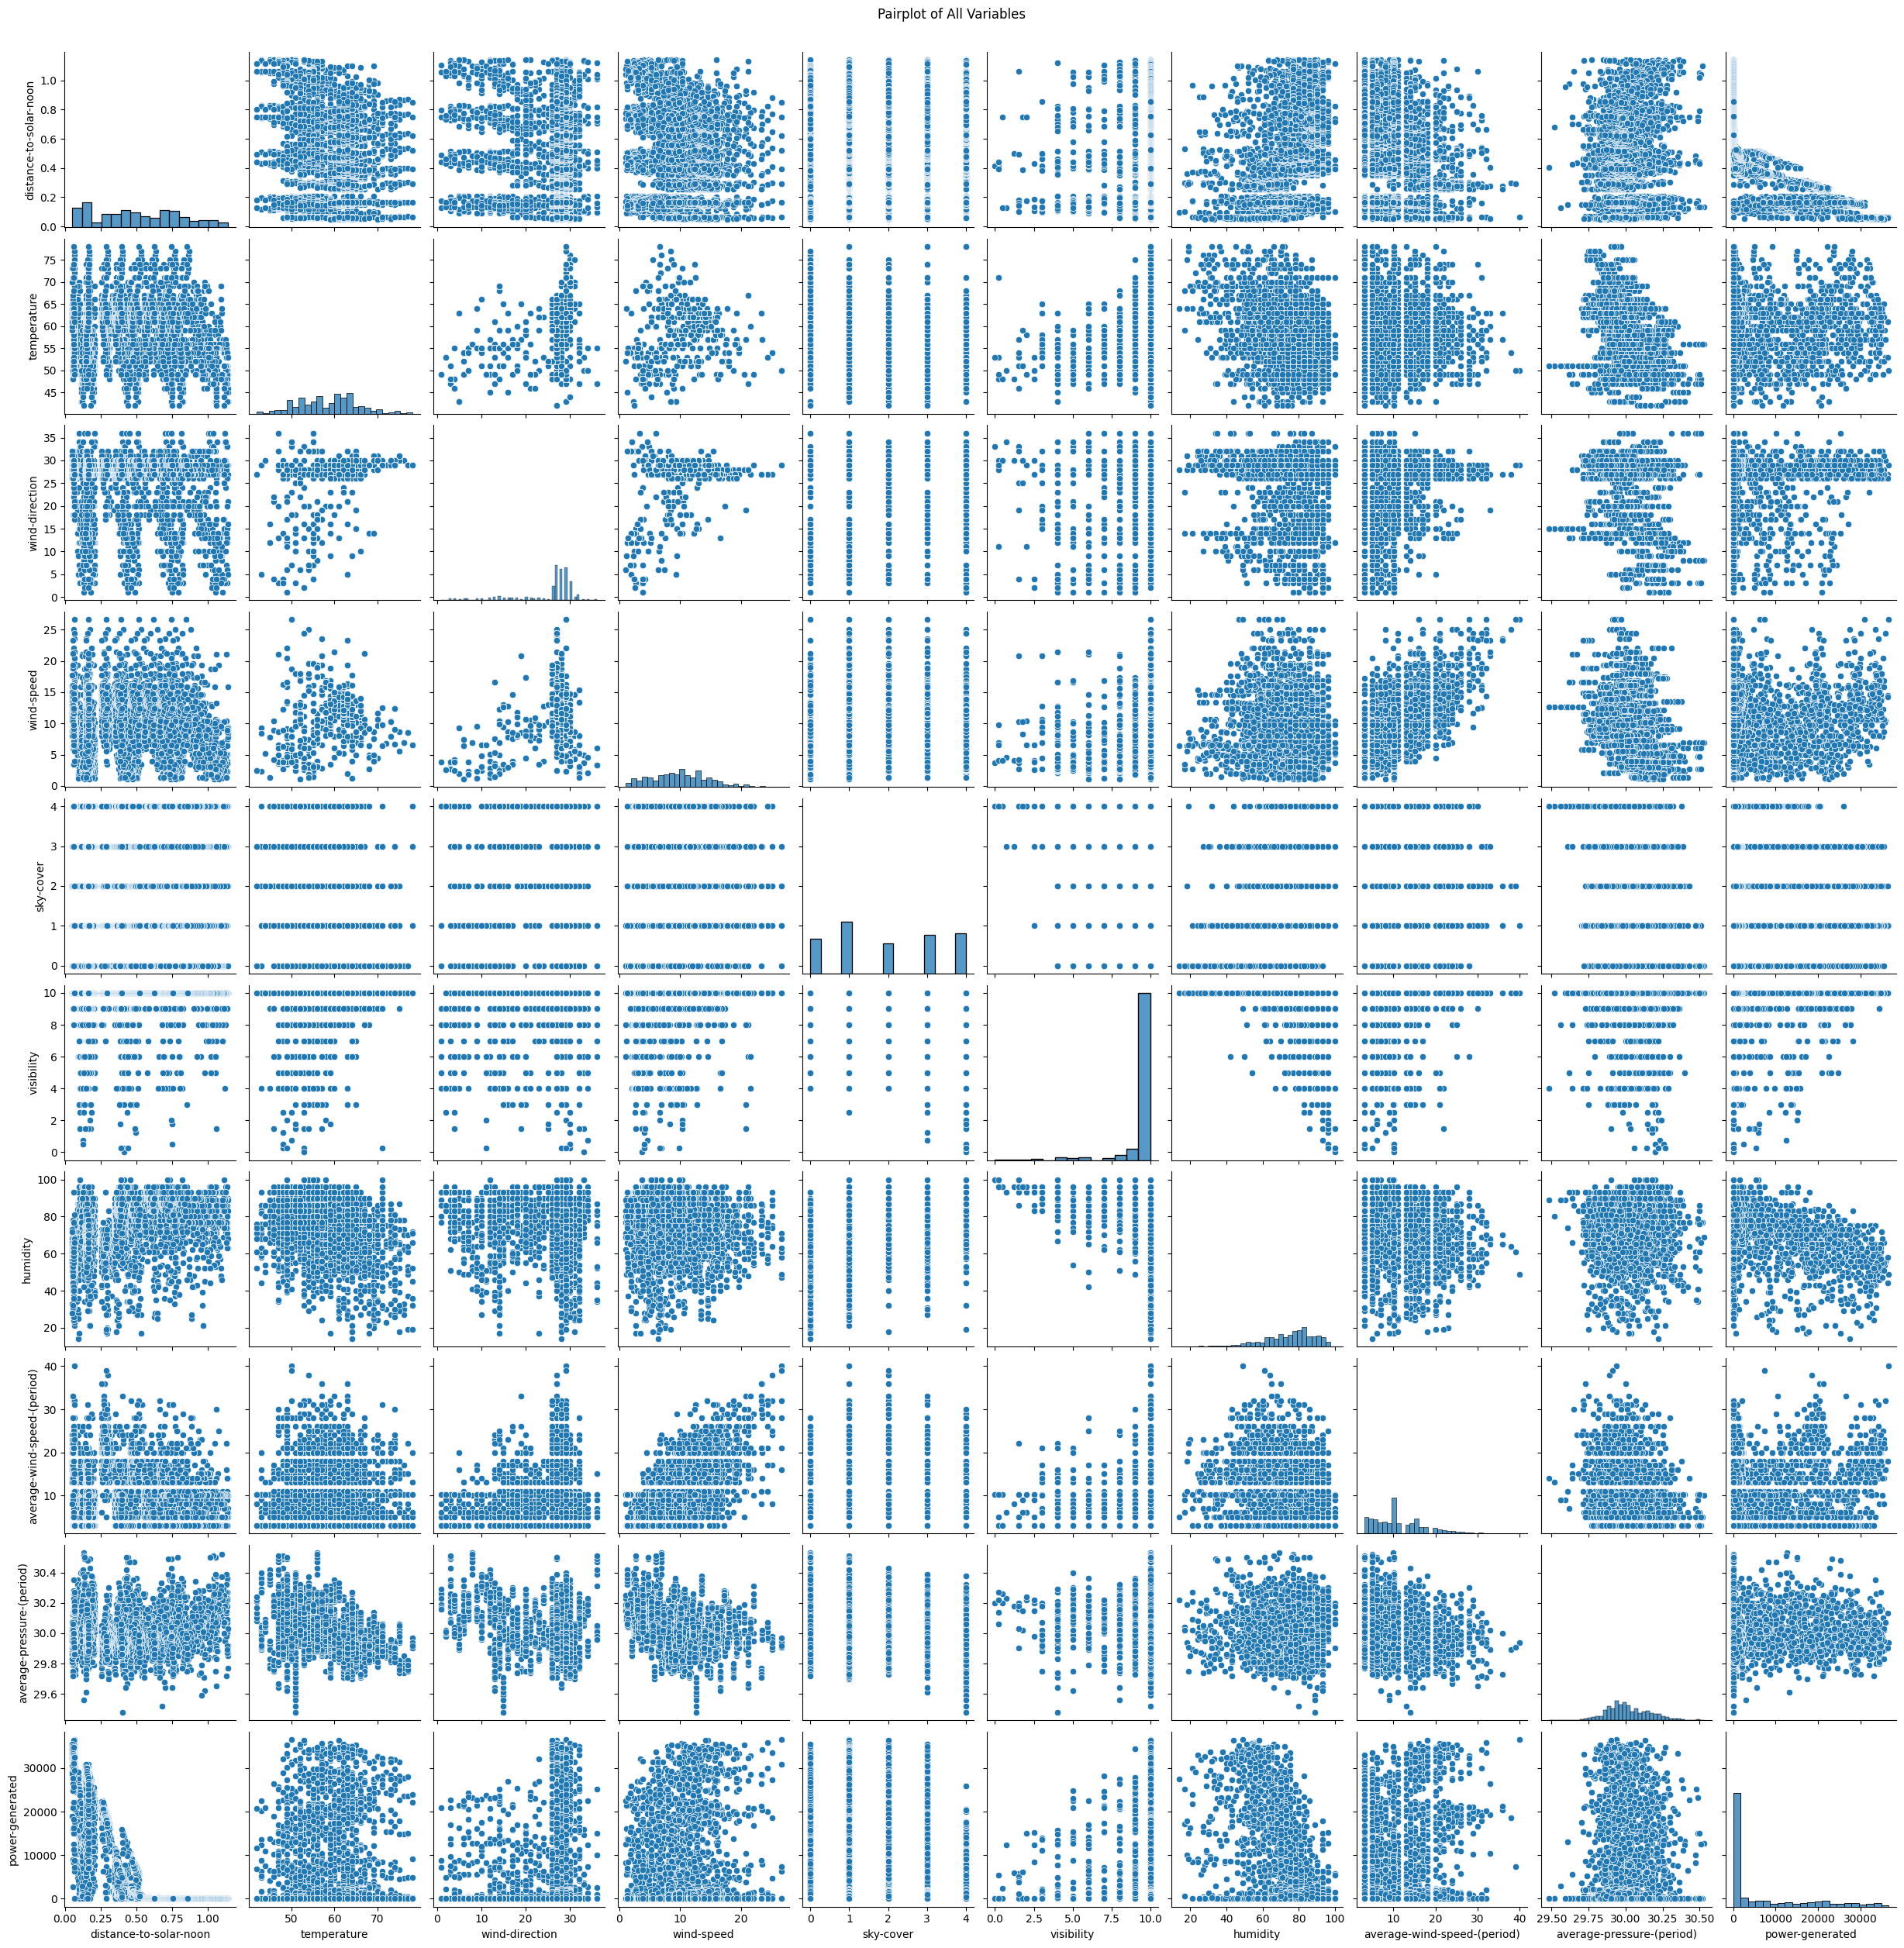

In [33]:
plt.figure(figsize=(25, 15))
sns.pairplot(df)
plt.suptitle('Pairplot of All Variables', y=1.01)

Barplot (Skewness)

Violin plot for distribution and probability density

Text(0.5, 1.0, 'Violin Plot of Power Generated')

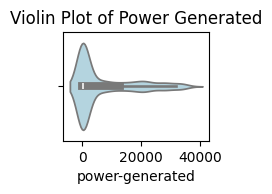

In [34]:
plt.subplot(3, 3, 8)
sns.violinplot(x=df['power-generated'], color='lightblue')
plt.title('Violin Plot of Power Generated')

Distribution of categorical variables

<ipython-input-35-cd2c0ef3d7d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sky-cover', data=df, palette='Set2')


Text(0.5, 1.0, 'Sky Cover Distribution')

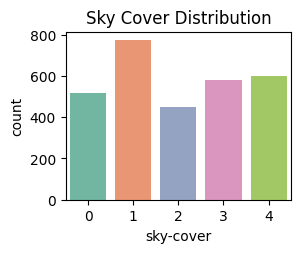

In [35]:
plt.subplot(2, 2, 1)
sns.countplot(x='sky-cover', data=df, palette='Set2')
plt.title('Sky Cover Distribution')

In [36]:
X = df.drop('power-generated', axis=1)
y = df['power-generated']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [39]:
# Dictionary to store the results
results = {}

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'KNN Regression': KNeighborsRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(random_state=42)
}

In [40]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}
    print(f'{name} - MSE: {mse}, MAE: {mae}, R-squared: {r2}')

Linear Regression - MSE: 38826020.074149214, MAE: 4988.42359528737, R-squared: 0.6258227913308818
Ridge Regression - MSE: 38825252.682613924, MAE: 4988.173429670331, R-squared: 0.6258301868976199
Lasso Regression - MSE: 38823851.71508687, MAE: 4988.305536129944, R-squared: 0.625843688413297
Elastic Net Regression - MSE: 43412499.441665925, MAE: 5147.800562966122, R-squared: 0.5816216075866191
Decision Tree Regression - MSE: 20255508.697488584, MAE: 2035.396118721461, R-squared: 0.8047920005675369
Random Forest Regression - MSE: 10887480.953283904, MAE: 1511.7619977168947, R-squared: 0.895074302625976
Gradient Boosting Regression - MSE: 10272625.15786795, MAE: 1651.7959950595957, R-squared: 0.9009998397998454
Support Vector Regression - MSE: 144235494.63270444, MAE: 6813.340306561042, R-squared: -0.390037780581288
KNN Regression - MSE: 19627031.67520548, MAE: 2487.9897260273974, R-squared: 0.8108488093123287
XGBoost Regression - MSE: 10746802.038800225, MAE: 1598.833525384534, R-squared

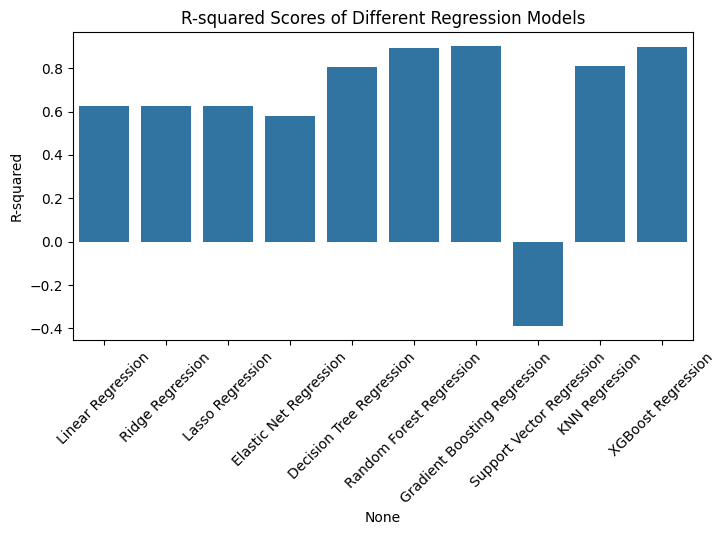

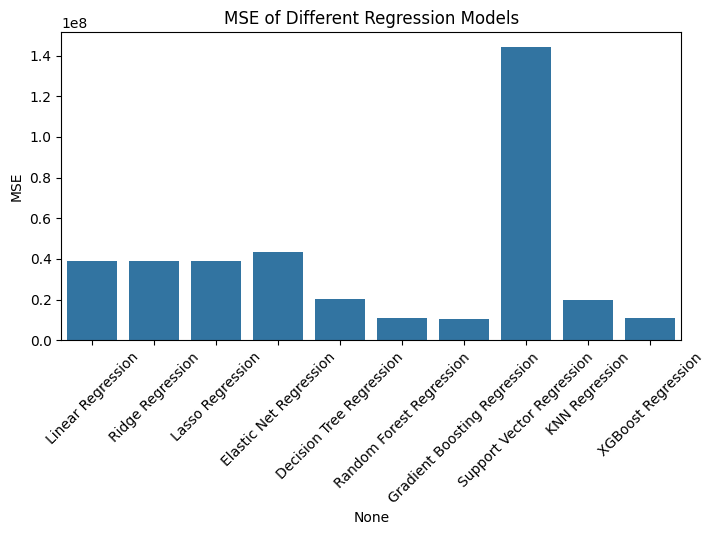

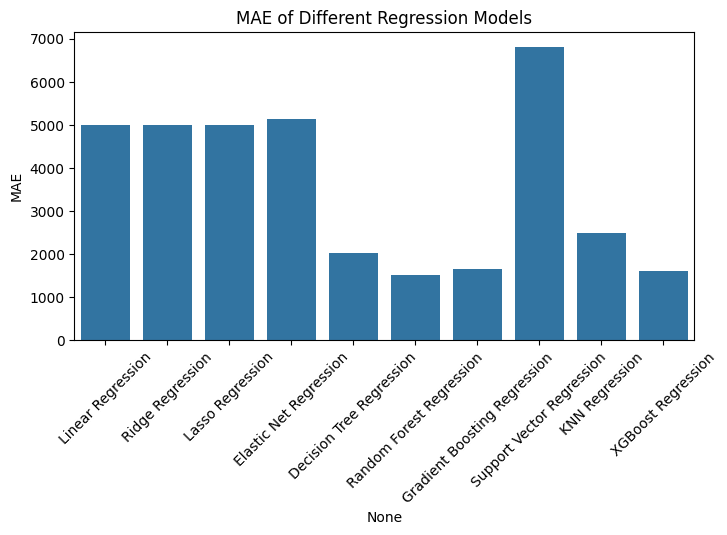

In [41]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting the results
plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='R-squared', data=results_df)
plt.title('R-squared Scores of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('MSE of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x=results_df.index, y='MAE', data=results_df)
plt.title('MAE of Different Regression Models')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Suppose we have results stored in a DataFrame `results_df`
best_model = results_df['R-squared'].idxmax()  # Model with highest R-squared
best_model_metrics = results_df.loc[best_model]  # Metrics for the best model

print(f"Best Model: {best_model}")
print(f"R-squared: {best_model_metrics['R-squared']}")
print(f"MSE: {best_model_metrics['MSE']}")
print(f"MAE: {best_model_metrics['MAE']}")


Best Model: Gradient Boosting Regression
R-squared: 0.9009998397998454
MSE: 10272625.15786795
MAE: 1651.7959950595957


In [43]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assume X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save both the model and the scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']